In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('Food_Delivery_Times.csv')

In [68]:
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [70]:
data.duplicated().any()

False

In [71]:
data.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

**Handling Missing Value**

In [72]:
weather_mode=data['Weather'].value_counts().idxmax()
data['Weather']=data['Weather'].fillna(weather_mode)

trafficlevel_mode=data['Traffic_Level'].value_counts().idxmax()
data['Traffic_Level']=data['Traffic_Level'].fillna(trafficlevel_mode)

timeofday_mode=data['Time_of_Day'].value_counts().idxmax()
data['Time_of_Day']=data['Time_of_Day'].fillna(timeofday_mode)

data['Courier_Experience_yrs'].nunique()
experience_mode=data['Courier_Experience_yrs'].mode()[0]
data['Courier_Experience_yrs']=data['Courier_Experience_yrs'].fillna(experience_mode)


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 1000 non-null   object 
 3   Traffic_Level           1000 non-null   object 
 4   Time_of_Day             1000 non-null   object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  1000 non-null   float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [74]:
data = data.drop('Order_ID',axis=1)

In [75]:
data.shape

(1000, 8)

In [76]:
data = pd.get_dummies(data, columns=['Weather','Time_of_Day','Vehicle_Type'], drop_first=True)
data['Traffic_Level'] = data['Traffic_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [77]:
data.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,0,12,1.0,43,False,False,False,True,False,False,False,False,True
1,16.42,1,20,2.0,84,False,False,False,False,True,False,False,False,False
2,9.52,0,28,1.0,59,True,False,False,False,False,False,True,False,True
3,7.44,1,5,1.0,37,False,True,False,False,False,False,False,False,True
4,19.03,0,16,5.0,68,False,False,False,False,False,True,False,False,False


In [78]:
data.shape

(1000, 14)

In [79]:
X = data.drop('Delivery_Time_min',axis=1)
Y = data['Delivery_Time_min']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [81]:
X_train.shape

(700, 13)

In [82]:
y_train.shape

(700,)

## Decision Tree

In [89]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

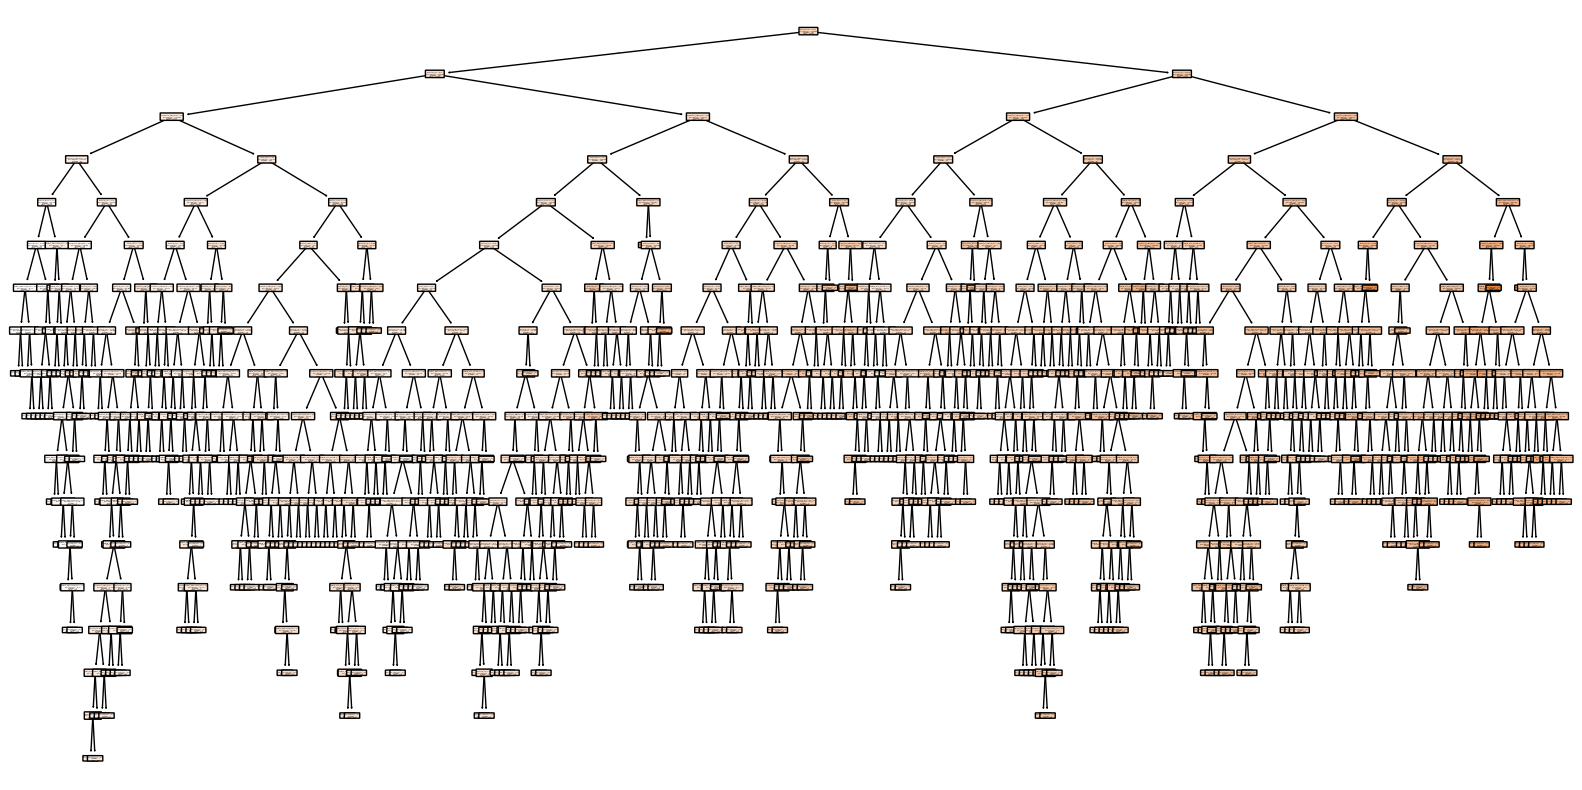

In [90]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
plt.show()


## Evaluate the Model

In [91]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Default Tree MSE: {mse} and R²: {r2}")

Default Tree MSE: 222.52333333333334 and R²: 0.5651207993798502


## Grid Search for finding best parameters

In [86]:
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
grid_param = {
    "criterion": ["mse", "friedman_mse", "mae"],
    "splitter": ["best", "random"],
    "max_depth": range(2, 15, 1),
    "min_samples_leaf": range(1, 15, 1),
    "min_samples_split": range(2, 15, 1)
}

# Initialize the regressor
reg = DecisionTreeRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=grid_param, cv=10, n_jobs=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)


{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 4, 'splitter': 'random'}


## Decision Tree Optimization by Pre-Pruning

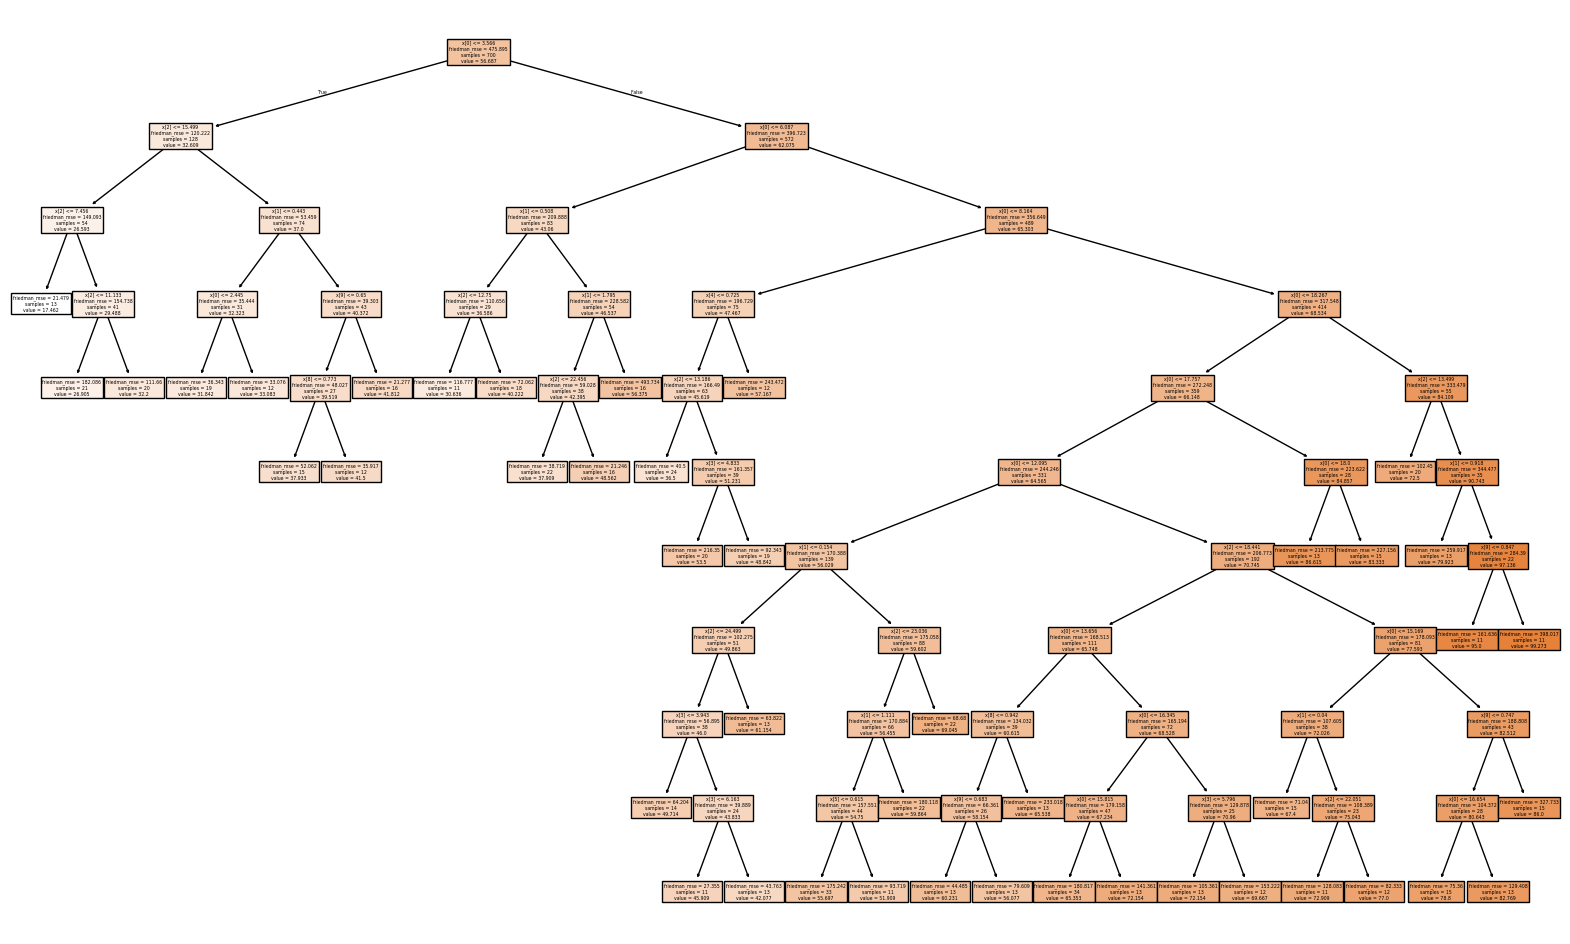

In [92]:
# Use the best parameters to initialize the regressor
best_reg = DecisionTreeRegressor(**grid_search.best_params_)
best_reg.fit(X_train, y_train)

# Plot the tree (optional)
plt.figure(figsize=(20,12))
plot_tree(best_reg, filled=True)
plt.show()

## Evaluate the Best Tree

In [93]:
from sklearn.metrics import mean_squared_error, r2_score



y_pred = best_reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Best Tree Train MSE: {mse} and Train R²: {r2}")

Best Tree Train MSE: 129.01174951527662 and Train R²: 0.7289071000934333


In [94]:
from sklearn.metrics import mean_squared_error, r2_score



y_pred = best_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Tree Test MSE: {mse} and Test R²: {r2}")

Best Tree Test MSE: 198.26849059461068 and Test R²: 0.6125222402237309


## Feature Importance

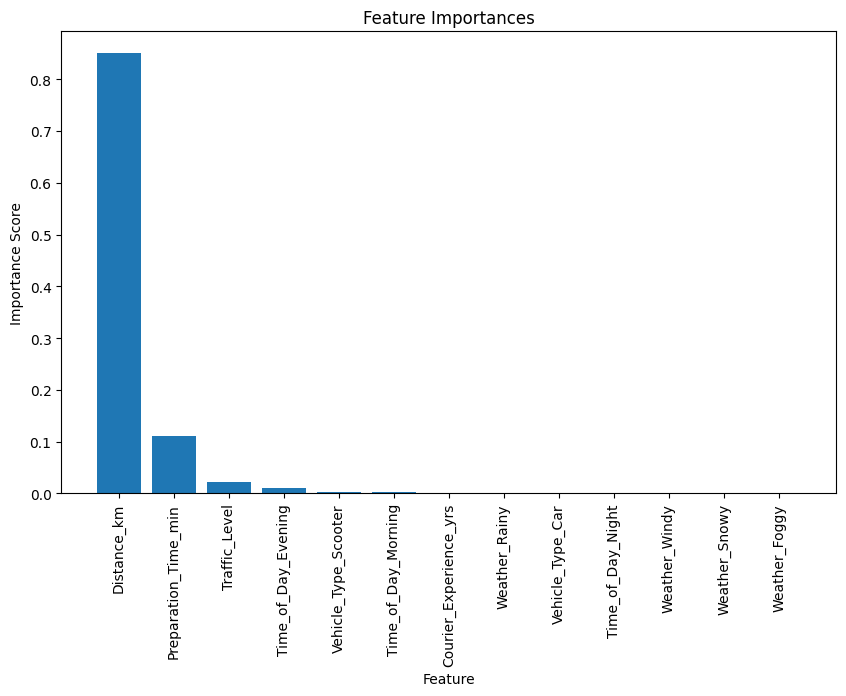

In [136]:
importances = best_reg.feature_importances_

# Get feature names (if available)
feature_names = X_train.columns  # Assuming X_train is a pandas DataFrame

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

## XGBoost 

In [102]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [103]:
# Initialize the XGBRegressor
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)

In [104]:
# Define the parameter grid for tuning
param_grid = {
    'max_depth': [3, 5],  # Fewer options
    'min_child_weight': [1, 3],  # Fewer options
    'subsample': [0.8],  # Single value
    'colsample_bytree': [0.8],  # Single value
    'gamma': [0, 0.1],  # Fewer options
    'reg_alpha': [0, 0.1],  # Fewer options
    'reg_lambda': [0, 0.1]  # Fewer options
}

grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=2, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[0]	validation_0-rmse:21.66799	validation_1-rmse:22.47569
[1]	validation_0-rmse:21.52325	validation_1-rmse:22.32818
[2]	validation_0-rmse:21.38860	validation_1-rmse:22.19817
[3]	validation_0-rmse:21.24381	validation_1-rmse:22.05587
[4]	validation_0-rmse:21.11300	validation_1-rmse:21.93278
[5]	validation_0-rmse:21.08005	validation_1-rmse:21.89787
[6]	validation_0-rmse:20.94574	validation_1-rmse:21.76257
[7]	validation_0-rmse:20.81751	validation_1-rmse:21.64211
[8]	validation_0-rmse:20.68345	validation_1-rmse:21.51569
[9]	validation_0-rmse:20.55219	validation_1-rmse:21.38657
[10]	validation_0-rmse:20.43133	validation_1-rmse:21.27100
[11]	validation_0-rmse:20.30977	validation_1-rmse:21.16072
[12]	validation_0-rmse:20.18151	validation_1-rmse:21.03414
[13]	validation_0-rmse:20.16378	validation_1-rmse:21.01999
[14]	validation_0-rmse:20.03402	validation_1-rmse:20.89408
[15]	validation_0-rmse:19.91476	validation_1-rmse:20.78399
[16]

In [105]:
# Train the model with the best parameters
best_reg = xgb.XGBRegressor(**grid_search.best_params_, objective='reg:squarederror', n_estimators=1000, early_stopping_rounds=50, learning_rate=0.01)
best_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[0]	validation_0-rmse:21.66799	validation_1-rmse:22.47569
[1]	validation_0-rmse:21.52325	validation_1-rmse:22.32818
[2]	validation_0-rmse:21.38860	validation_1-rmse:22.19817
[3]	validation_0-rmse:21.24381	validation_1-rmse:22.05587
[4]	validation_0-rmse:21.11300	validation_1-rmse:21.93278
[5]	validation_0-rmse:21.08005	validation_1-rmse:21.89787
[6]	validation_0-rmse:20.94574	validation_1-rmse:21.76257
[7]	validation_0-rmse:20.81751	validation_1-rmse:21.64211
[8]	validation_0-rmse:20.68345	validation_1-rmse:21.51569
[9]	validation_0-rmse:20.55219	validation_1-rmse:21.38657
[10]	validation_0-rmse:20.43133	validation_1-rmse:21.27100
[11]	validation_0-rmse:20.30977	validation_1-rmse:21.16072
[12]	validation_0-rmse:20.18151	validation_1-rmse:21.03414
[13]	validation_0-rmse:20.16378	validation_1-rmse:21.01999
[14]	validation_0-rmse:20.03402	validation_1-rmse:20.89408
[15]	validation_0-rmse:19.91476	validation_1-rmse:20.78399
[16]	validation_0-rmse:19.79880	validation_1-rmse:20.67774
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
# Evaluate the model
y_pred = best_reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Train Error: {mse}")
print(f"Mean Absolute Train Error: {mae}")
print(f"Train R^2 Score: {r2}")

Mean Squared Train Error: 75.8337670430588
Mean Absolute Train Error: 5.715304050445557
Train R^2 Score: 0.840650200843811


In [108]:
# Evaluate the model
y_pred = best_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Test Error: {mse}")
print(f"Mean Absolute Test Error: {mae}")
print(f"Test R^2 Score: {r2}")

Mean Squared Test Error: 134.7706899103804
Mean Absolute Test Error: 7.349877122243245
Test R^2 Score: 0.7366164922714233


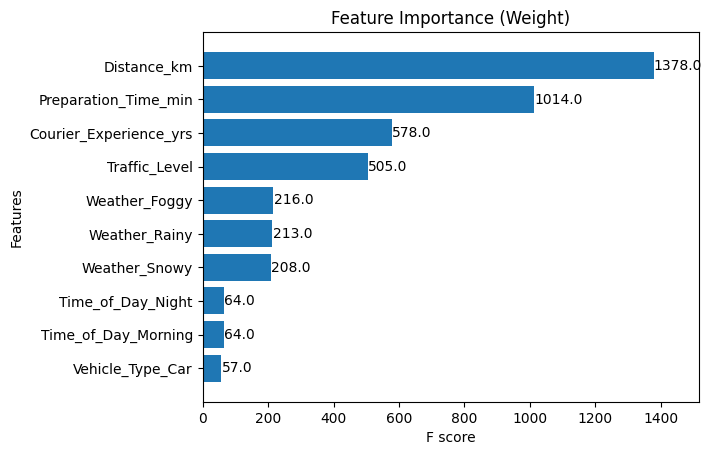

In [109]:
# Plot feature importance
xgb.plot_importance(best_reg, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance (Weight)')
plt.grid(False)
plt.show()

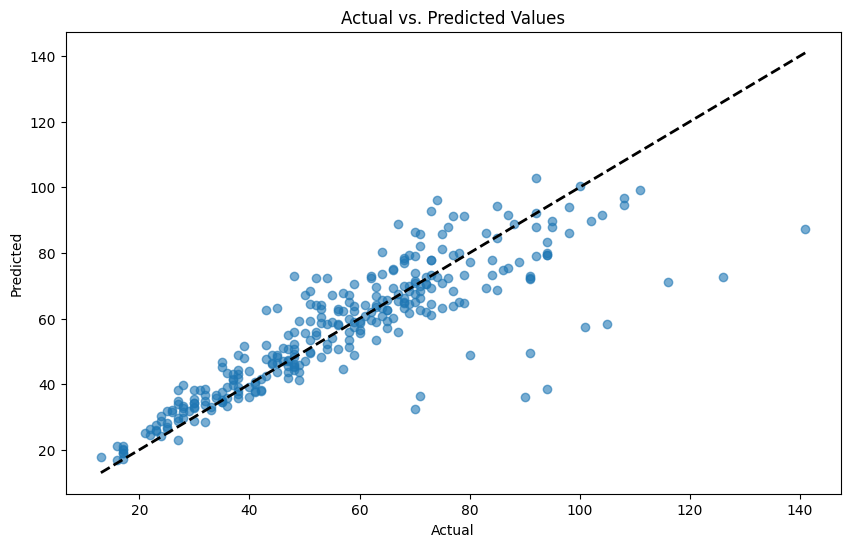

In [110]:
# Optional: Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

In [113]:
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider at every split
}

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=2, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [114]:
# Train the model with the best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=42)

In [118]:
# Evaluate the model
y_pred = best_rf.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Train Error (MSE): {mse}")
print(f"Mean Absolute Train Error (MAE): {mae}")
print(f"Train R² Score: {r2}")

Mean Squared Train Error (MSE): 18.12861403422619
Mean Absolute Train Error (MAE): 2.9107499999999993
Train R² Score: 0.9619062715737894


In [119]:
# Evaluate the model
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 149.83867305266202
Mean Absolute Error (MAE): 8.246101388888889
R² Score: 0.7071690353410474


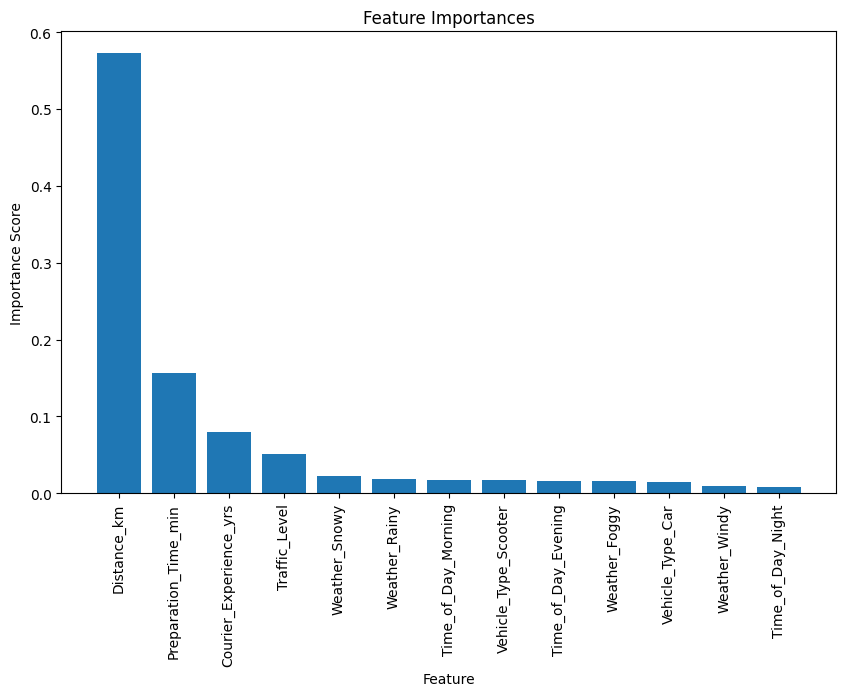

In [117]:
#Plot feature importance
feature_importances = best_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]  # Sort features by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

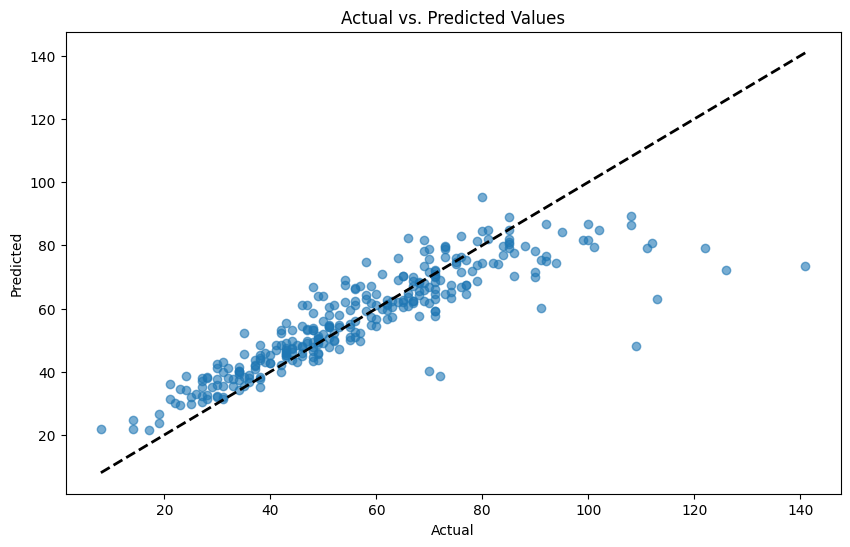

In [45]:
# Optional: Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()